In [3]:
import xarray as xr
from cartopy import crs as ccrs
from cartopy import feature as cf

In [5]:
d=xr.open_dataset('C:/Users/ofo/Desktop/Internship/JNAA_Lab_Interns_2022-master/Relative_humidity_1981_2020.nc')

In [6]:
d

<xarray.Dataset>
Dimensions:    (longitude: 137, latitude: 65, time: 8640)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 08:59:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [13]:
da_rh = d.r

In [8]:
rh = d['r']

# Taking a Quick look

(array([ 7657101., 15013513.,  9026610.,  5053016.,  4013147.,  4223289.,
         5659436.,  8392640., 12743364.,  5157084.]),
 array([  3.6426811,  13.383247 ,  23.123814 ,  32.86438  ,  42.604946 ,
         52.345512 ,  62.086075 ,  71.826645 ,  81.56721  ,  91.30778  ,
        101.04834  ], dtype=float32),
 <BarContainer object of 10 artists>)

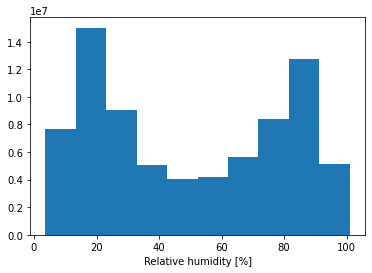

In [20]:
da_rh.plot()


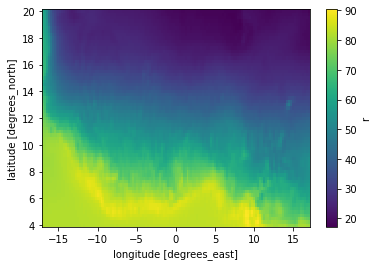

In [15]:
da_rh.mean('time').plot()

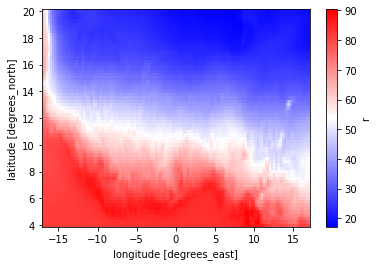

In [33]:
da_rh.mean('time').plot(cmap = 'bwr')

In [36]:
da_ghana = da_rh.sel(longitude = slice(-3.5,1.5), latitude = slice(11.5,4))

In [37]:
da_ghana

<xarray.DataArray 'r' (time: 8640, latitude: 31, longitude: 21)>
array([[[18.596954, 17.94593 , ..., 16.550236, 16.365929],
        [18.932873, 18.534527, ..., 16.208374, 16.44619 ],
        ...,
        [83.73967 , 83.82737 , ..., 80.459274, 80.18876 ],
        [83.85115 , 83.773865, ..., 80.63913 , 80.51279 ]],

       [[19.39959 , 18.751537, ..., 17.193829, 16.967903],
        [19.72956 , 19.35054 , ..., 16.956013, 17.110596],
        ...,
        [84.12464 , 84.27774 , ..., 80.71047 , 80.34334 ],
        [84.0533  , 83.992355, ..., 80.692635, 80.49495 ]],

       ...,

       [[26.777882, 26.749641, ..., 22.840513, 22.746874],
        [27.675644, 27.005295, ..., 22.39312 , 23.223995],
        ...,
        [81.04044 , 81.19354 , ..., 81.33623 , 81.394196],
        [81.33177 , 81.467026, ..., 81.60229 , 81.66174 ]],

       [[28.149794, 28.173574, ..., 24.298634, 24.27485 ],
        [29.029718, 28.39207 , ..., 23.97312 , 24.699951],
        ...,
        [81.43879 , 81.571075, ..., 81.51756 , 81.854965],
        [81.747955, 81.70485 , ..., 81.820786, 82.22804 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.5 -3.25 -3.0 -2.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

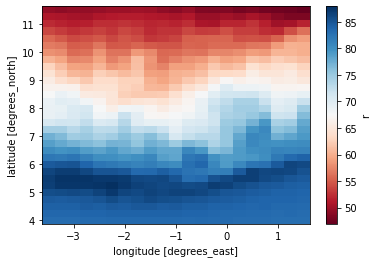

In [38]:
da_ghana.mean('time').plot(cmap = 'RdBu')

In [39]:
ghana_mean = da_ghana.mean('time')

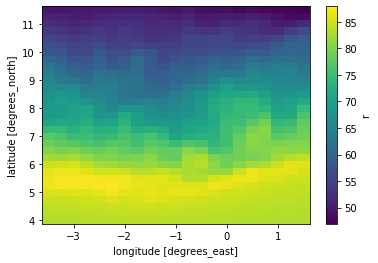

In [40]:
ghana_mean.plot()

Yearly Data
=

In [41]:
yearly_rh = da_rh.groupby('time.year').mean()

In [42]:
yearly_rh

<xarray.DataArray 'r' (year: 30, latitude: 65, longitude: 137)>
array([[[62.08644 , 57.466106, 52.380657, ..., 20.121212, 19.989487,
         19.142902],
        [62.41358 , 58.679356, 52.691895, ..., 20.781345, 20.661165,
         19.983555],
        [62.518616, 59.588284, 53.517807, ..., 20.907885, 20.876915,
         20.599909],
        ...,
        [83.126854, 83.09155 , 83.06372 , ..., 78.148   , 77.13313 ,
         76.575836],
        [83.14703 , 83.10474 , 83.05606 , ..., 81.96101 , 81.15725 ,
         80.41153 ],
        [83.07581 , 83.04037 , 82.92537 , ..., 83.956566, 83.62209 ,
         83.45141 ]],

       [[60.387268, 55.39928 , 50.210983, ..., 20.81307 , 20.738544,
         19.870745],
        [60.693222, 56.59586 , 50.566254, ..., 21.639133, 21.581072,
         20.789694],
        [60.85953 , 57.553154, 51.311787, ..., 21.890678, 21.862188,
         21.469734],
...
        [82.26669 , 82.338264, 82.39744 , ..., 74.21053 , 72.67627 ,
         71.67117 ],
        [82.32822 , 82.39078 , 82.43513 , ..., 78.690865, 77.090355,
         76.18274 ],
        [82.38409 , 82.43688 , 82.387794, ..., 80.915695, 79.589584,
         79.52507 ]],

       [[57.590252, 53.963882, 49.699886, ..., 19.486488, 19.232384,
         18.300896],
        [57.82106 , 55.102394, 49.596737, ..., 20.101114, 19.885103,
         19.120554],
        [57.66284 , 55.715042, 50.16667 , ..., 20.250954, 20.248466,
         19.974012],
        ...,
        [80.90894 , 80.96064 , 80.98714 , ..., 68.57502 , 67.61801 ,
         66.65288 ],
        [81.00719 , 81.06369 , 81.13607 , ..., 72.37236 , 71.61266 ,
         70.557335],
        [81.10213 , 81.155846, 81.17823 , ..., 74.4372  , 73.97037 ,
         73.42812 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * year       (year) int64 1991 1992 1993 1994 1995 ... 2017 2018 2019 2020